<a href="https://colab.research.google.com/github/BrendaGuadalupeVazquez/Simulaci-n-II/blob/main/MCMC_MH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MCMC METRÓPOLIS-HASTINGS**

19 de Octubre de 2025

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def f(x1,x2):
  c=1/20216.335877
  exp=-0.5*(x1**2*x2**2+x1**2+x2**2-8*x1-8*x2)
  return c*np.exp(exp)

In [38]:
x1=np.linspace(-5,5,100)
x2=np.linspace(-5,5,100)
X1,X2=np.meshgrid(x1,x2)#Covertimos vectores unidimensionales en matrices bidimensionales
Z=f(X1,X2)

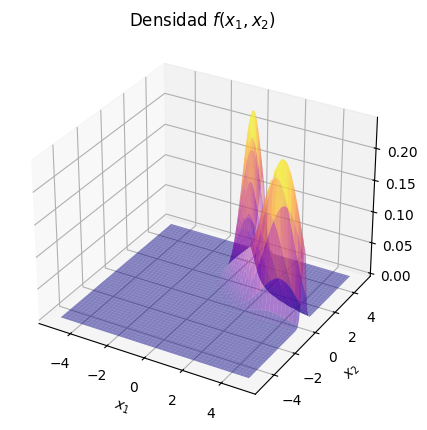

In [39]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(X1,X2,Z,cmap='plasma',alpha=0.5)
ax.set_title("Densidad $f(x_1,x_2)$")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

In [40]:
def metropolis2D(x0,N,sigma):
    lista=[]
    x=np.array(x0)
    x_1=0
    for i in range(N):
        q=x+np.random.normal(0,sigma,2)
        alpha=min(1,f(q[0],q[1])/f(x[0],x[1]))
        u=np.random.uniform(0,1)
        if u<alpha:
            x=q
            x_1+=1
        lista.append(x)
    t=x_1/N
    return np.array(lista),t

In [41]:
X_M,t=metropolis2D([0,0],1000,0.5)
print("Tasa de aceptación: ",t)

Tasa de aceptación:  0.519


El algoritmo de Metropolis-Hastings funciona en lugar de tomar valores al azar, el método va caminando por el espacio de la función proponiendo nuevos puntos cercanos al anterior y decide si los acepta o no dependiendo de qué tan probables son según la función objetivo. Si el nuevo punto tiene una probabilidad más alta, se acepta y se convierte en el nuevo punto desde el que se explorará.

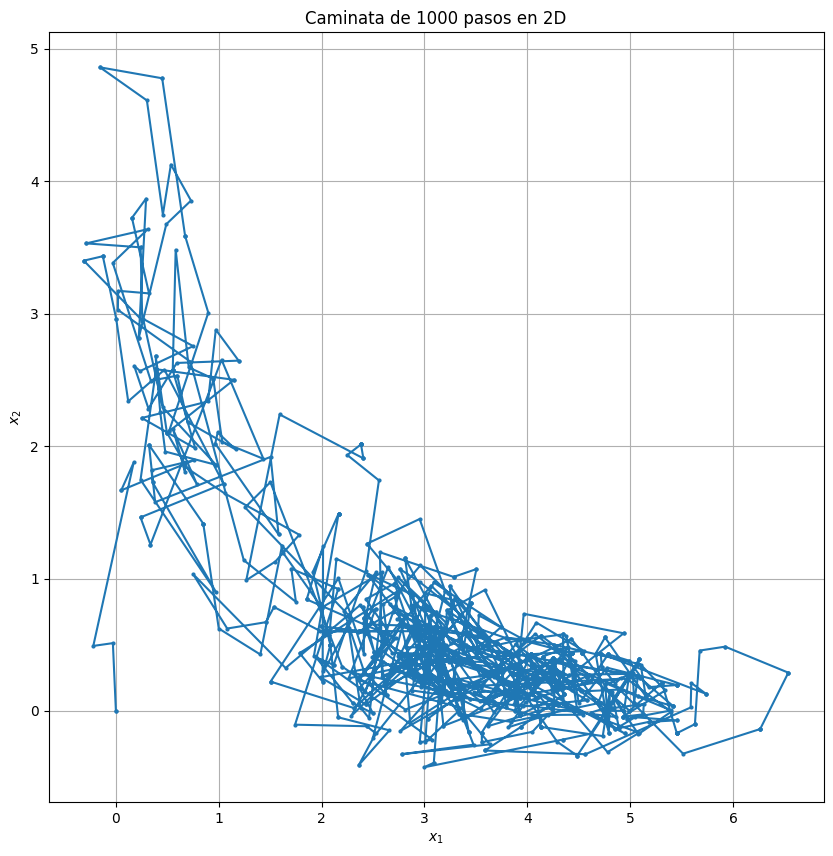

In [42]:
plt.figure(figsize=(10,10))
plt.plot(X_M[:1000,0],X_M[:1000,1],'-o',markersize=2)
plt.title("Caminata de 1000 pasos en 2D")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(True)
plt.show()

In [43]:
prom_x1=np.mean(f(X1,X2),axis=0)#promedio sobre x2
prom_x2=np.mean(f(X1,X2),axis=1)#promedio sobre x1
norm_x1=prom_x1/np.max(prom_x1)
norm_x2=prom_x2/np.max(prom_x2)

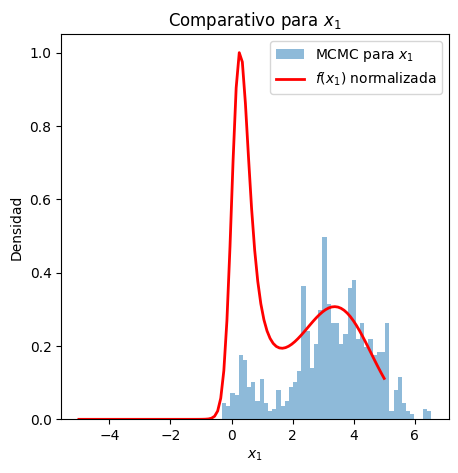

In [44]:
plt.figure(figsize=(5,5))#Histograma de x1
plt.hist(X_M[:,0],bins=50,density=True,alpha=0.5,label='MCMC para $x_1$')
plt.plot(x1,norm_x1,'r-',lw=2,label='$f(x_1)$ normalizada')
plt.title("Comparativo para $x_1$")
plt.xlabel("$x_1$")
plt.ylabel("Densidad")
plt.legend()
plt.show()

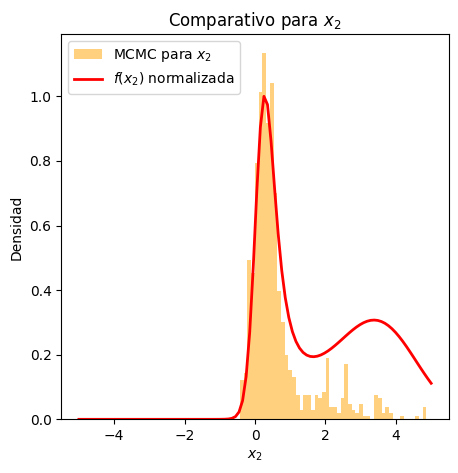

In [45]:
plt.figure(figsize=(5,5))#Histograma de x2
plt.hist(X_M[:,1],bins=50,density=True,alpha=0.5,color='orange',label='MCMC para $x_2$')
plt.plot(x2,norm_x2,'r-',lw=2,label='$f(x_2)$ normalizada')
plt.title("Comparativo para $x_2$")
plt.xlabel("$x_2$")
plt.ylabel("Densidad")
plt.legend()
plt.show()

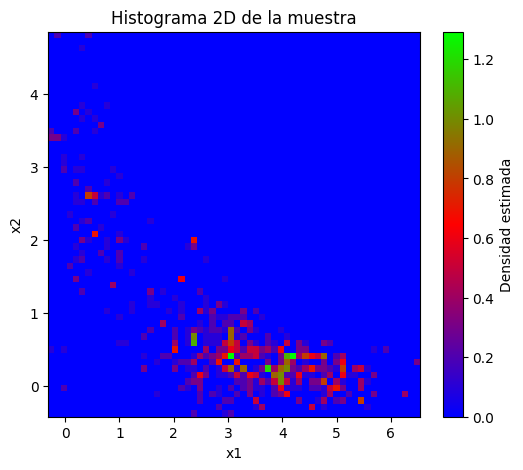

In [46]:
plt.figure(figsize=(6,5))
plt.hist2d(X_M[:,0],X_M[:,1],bins=60,density=True,cmap='brg')
plt.colorbar(label='Densidad estimada')
plt.title("Histograma 2D de la muestra")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

Una vez que se tiene una gran cantidad de muestras provenientes del algoritmo, la cadena se concentra en las regiones donde $f(x_1,x_2)$ es mayor, porque el algoritmo pasa más tiempo en las áreas de alta probabilidad, entonces entre más muestras se generen, más precisa será la estimación del punto que maximiza la función.

In [50]:
v=np.array([f(x[0],x[1]) for x in X_M])
imax=np.argmax(v)#devuelve los índices de los valores máximos a lo largo de un eje
xmax=X_M[imax]
print("Máximo estimado de f(x_1,x_2): ")
print("x_1=",xmax[0],"\nx_2=",xmax[1],"\nf=",v[imax])

Máximo estimado de f(x_1,x_2): 
x_1= 3.707161651312407 
x_2= 0.27197973521515 
f= 0.24304758683943656
